# Project 2:  Holiday weather

by Zakia Syeda, 20 December 2017

This is the project notebook for Week 2 of The Open University's [_Learn to code for Data Analysis_](http://futurelearn.com/courses/learn-to-code) course.



Objective: To predict weather for a country for summer holiday break for two weeks using historic weather data (2014) from 'Weather Underground'. I've chosen Beijing for this purpose.

Following codes will be executed to analyse weather data for "Beijing" to infer results.



In [75]:
import warnings
warnings.simplefilter('ignore', FutureWarning)

from pandas import *
beijing = read_csv('Beijing_PEK_2014.csv', skipinitialspace=True)

## Cleaning the data
First we need to clean up the data we'll rename `'WindDirDegrees< br />'` to `'WindDirDegrees'`. 

remove the  `< br />`  html line breaks from the values in the `'WindDirDegrees'` column. 

In [77]:
beijing = beijing.rename(columns={'WindDirDegrees<br />' : 'WindDirDegrees'})

In [78]:
beijing['WindDirDegrees'].head()

0    291<br />
1     20<br />
2     24<br />
3     56<br />
4     18<br />
Name: WindDirDegrees, dtype: object

In [79]:
beijing['WindDirDegrees'] = beijing['WindDirDegrees'].str.rstrip('< br />')

In [80]:
beijing['WindDirDegrees'].head()

0    291
1     20
2     24
3     56
4     18
Name: WindDirDegrees, dtype: object

In [81]:
beijing.dtypes

Date                           object
Max TemperatureC                int64
Mean TemperatureC               int64
Min TemperatureC                int64
Dew PointC                      int64
MeanDew PointC                  int64
Min DewpointC                   int64
Max Humidity                    int64
Mean Humidity                   int64
Min Humidity                    int64
Max Sea Level PressurehPa       int64
Mean Sea Level PressurehPa      int64
Min Sea Level PressurehPa       int64
Max VisibilityKm                int64
Mean VisibilityKm               int64
Min VisibilitykM                int64
Max Wind SpeedKm/h              int64
Mean Wind SpeedKm/h             int64
Max Gust SpeedKm/h            float64
Precipitationmm               float64
CloudCover                    float64
Events                         object
WindDirDegrees                 object
dtype: object

and change the values in the `'WindDirDegrees'` column to `float64`:

In [82]:
beijing['WindDirDegrees'] = beijing['WindDirDegrees'].astype('float64')   

In [83]:
beijing['WindDirDegrees'].head()

0    291.0
1     20.0
2     24.0
3     56.0
4     18.0
Name: WindDirDegrees, dtype: float64

We need to change the values in the `'Date'` column into values of the `datetime64`  date type.

In [84]:
beijing['Date'] = to_datetime(beijing['Date'])
beijing.dtypes


Date                          datetime64[ns]
Max TemperatureC                       int64
Mean TemperatureC                      int64
Min TemperatureC                       int64
Dew PointC                             int64
MeanDew PointC                         int64
Min DewpointC                          int64
Max Humidity                           int64
Mean Humidity                          int64
Min Humidity                           int64
Max Sea Level PressurehPa              int64
Mean Sea Level PressurehPa             int64
Min Sea Level PressurehPa              int64
Max VisibilityKm                       int64
Mean VisibilityKm                      int64
Min VisibilitykM                       int64
Max Wind SpeedKm/h                     int64
Mean Wind SpeedKm/h                    int64
Max Gust SpeedKm/h                   float64
Precipitationmm                      float64
CloudCover                           float64
Events                                object
WindDirDeg

We also need to change the index from the default to the `datetime64` values in the `'Date'` column so that it is easier to pull out rows between particular dates and display more meaningful graphs: 

In [85]:
beijing.index = beijing['Date']

## Finding a summer break

According to meteorologists, summer extends for the whole months of June, July, and August in the northern hemisphere and the whole months of December, January, and February in the southern hemisphere. As I've chosen Beijing as my holiday city which lies in northern hemisphere, I'm going to create a dataframe that holds just those months using the `datetime` index, like this:

In [87]:
summer = beijing.loc[datetime(2014, 6, 1) : datetime(2014, 8, 31)]


Let's look for best temperatures during June and August.

In [88]:
summer[summer['Mean TemperatureC'] >= 25]

,Date,Max TemperatureC,Mean TemperatureC,Min TemperatureC,Dew PointC,MeanDew PointC,Min DewpointC,Max Humidity,Mean Humidity,Min Humidity,...,Max VisibilityKm,Mean VisibilityKm,Min VisibilitykM,Max Wind SpeedKm/h,Mean Wind SpeedKm/h,Max Gust SpeedKm/h,Precipitationmm,CloudCover,Events,WindDirDegrees
Date,,,,,,,,,,,,,,,,,,,,,
2014-06-01,2014-06-01,31,25,19,18,16,12,88,64,25,...,21,10,6,21,13,35.0,2.03,4.0,Rain-Thunderstorm,16.0
2014-06-05,2014-06-05,34,27,19,17,15,13,83,47,19,...,23,9,6,14,8,NaN,0.00,NaN,NaN,172.0
2014-06-12,2014-06-12,36,27,18,18,14,9,83,46,12,...,31,19,5,18,6,26.0,0.00,NaN,Rain,36.0
2014-06-13,2014-06-13,32,26,19,20,17,15,94,63,28,...,26,11,3,55,6,84.0,11.94,3.0,Rain-Thunderstorm,58.0
2014-06-15,2014-06-15,32,26,20,21,18,16,88,62,31,...,10,6,2,40,8,55.0,2.03,5.0,Rain-Thunderstorm,107.0
2014-06-16,2014-06-16,30,26,21,21,19,18,94,71,40,...,7,4,2,14,6,NaN,0.00,NaN,Rain,157.0
2014-06-24,2014-06-24,31,25,19,19,17,15,94,56,28,...,21,15,8,18,6,NaN,0.00,NaN,NaN,141.0
2014-06-26,2014-06-26,33,28,22,21,21,17,91,69,43,...,21,5,1,18,6,NaN,0.00,1.0,NaN,134.0
2014-06-27,2014-06-27,34,27,21,19,13,9,78,40,13,...,31,26,16,29,11,35.0,0.00,NaN,NaN,27.0


In [89]:
summer.loc[datetime(2014,7,1) : datetime(2014,7,31)]
summer['Max TemperatureC'].max()

38

In [90]:
summer['Precipitationmm'].max()

43.939999999999998

Beijing looks pretty warm throughout summer. To find the best temperatures in summer and get clear idea we'll plot a graph. 

In [91]:
%matplotlib inline

Now let's plot the `'Mean TemperatureC'` for the summer:

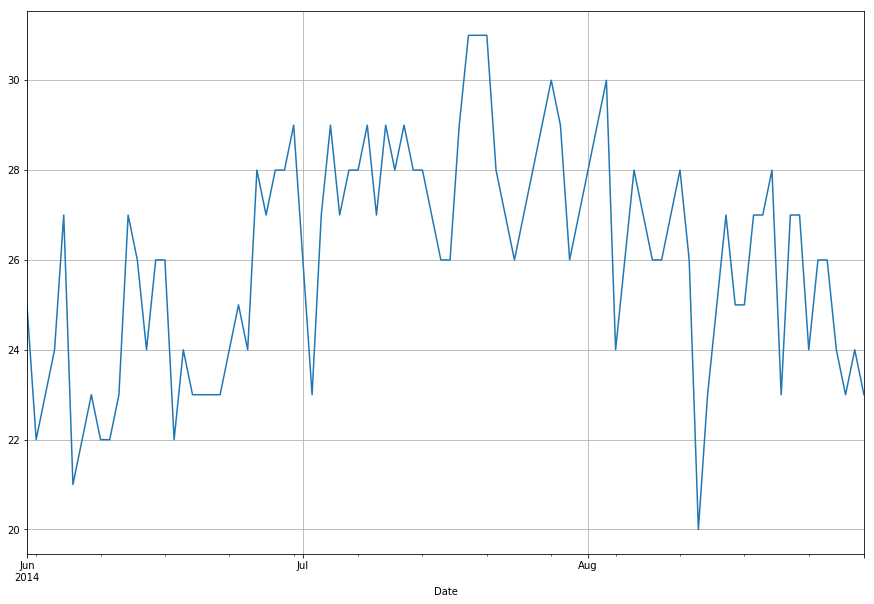

In [92]:
summer['Mean TemperatureC'].plot(grid=True, figsize=(15,10))

July just looks good as mean temperatures are over 20 degrees C. As we are looking for sunny dry days we will check for precipitation as well. 

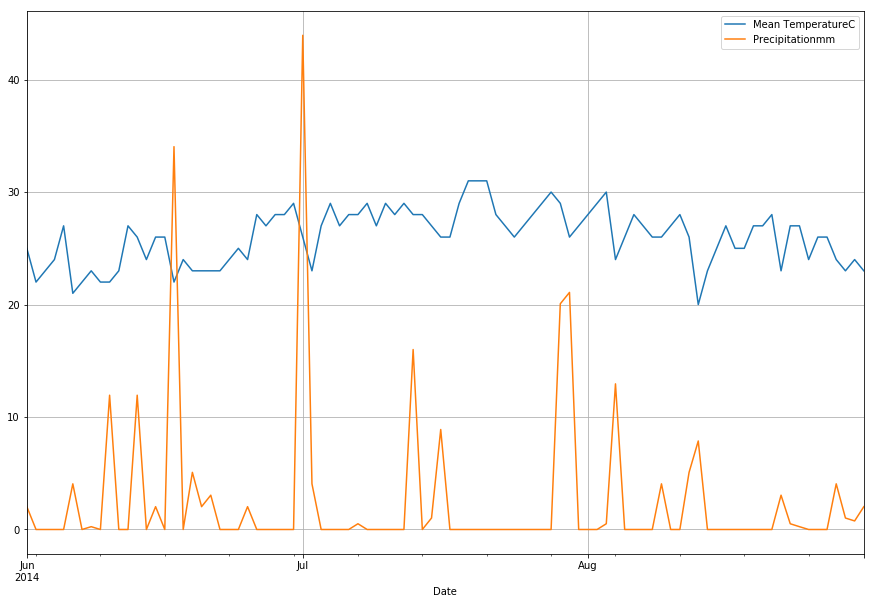

In [93]:
summer[['Mean TemperatureC', 'Precipitationmm']].plot(grid=True, figsize=(15, 10))


First half of July looks pretty ideal as the temperatures are over 20 degrees Celsius and with precipitation showing no peaks of heavy rain. Let's plot a graph for July.   

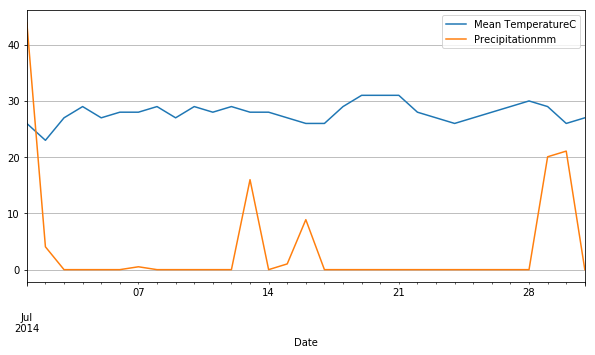

In [94]:
july= summer.loc[datetime(2014, 7, 1) : datetime(2014, 7, 31)]
july[['Mean TemperatureC', 'Precipitationmm']].plot(grid=True, figsize=(10,5))


First half of July looks just ideal as there is no significant rain and the temperatures are above 25 Degrees Celsius.


## Conclusions
As depicted in the graphs, summer in Beijing is extremely hot and there is significant amount of rainfall and thunderstorms, highest amount of rain was above 43mm in June 2014. Temperatures are pretty high ranging between 30 C and 38 C. Maximum temperature reported was 38 C on July 10 2014.